PAR ELIE

# Data Analysis with Python



## Objectifs

Après avoir terminé ce laboratoire, vous serez capable de :

    - Explorer les caractéristiques ou les attributs pour prédire le prix d'une voiture.

<h2>Table des matières</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#import_data">Importation des données depuis le module</a></li>
    <li><a href="#pattern_visualization">Analyse des motifs individuels à l'aide de la visualisation</a></li>
    <li><a href="#discriptive_statistics">Analyse statistique descriptive</a></li>
    <li><a href="#basic_grouping">Principes de regroupement</a></li>
    <li><a href="#correlation_causation">Corrélation et causalité</a></li>
    <li><a href="#anova">ANOVA</a></li>
</ol>
</div>

<hr>


<h3>Quelles sont les principales caractéristiques qui ont le plus d'impact sur le prix de la voiture ?</h3>


<h2 id="import_data">1. Importation des données depuis le Module 2</h2>


<h4>Configuration</h4>


 Importer les libraries 


In [10]:
import pandas as pd
import numpy as np

Charger les données et les stocker dans le dataframe df :


Ce jeu de données était hébergé sur le stockage d'objets IBM Cloud. Cliquez <a href="https://cocl.us/DA101EN_object_storage">ICI</a> pour un stockage gratuit.




In [11]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2 id="pattern_visualization">2. Analyse des motifs individuels à l'aide de la visualisation</h2>


Pour installer seaborn, nous utilisons pip qui est le gestionnaire de packages Python.








In [12]:
%%capture
! pip install seaborn

Importer les packages de visualisation "Matplotlib" et "Seaborn", n'oubliez pas "%matplotlib inline" pour tracer dans un notebook Jupyter.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h4>Comment choisir la bonne méthode de visualisation ?</h4>
<p>Lors de la visualisation de variables individuelles, il est important de comprendre d'abord le type de variable avec lequel vous travaillez. Cela nous aidera à trouver la bonne méthode de visualisation pour cette variable.</p>


In [14]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3>Question  #1:</h3>
<b>Quel est le type de données de la colonne "peak-rpm" ?</b>
</div>


<details><summary>Click here for the solution</summary>

```python
float64
```

</details>


Par exemple, nous pouvons calculer la corrélation entre les variables de type "int64" ou "float64" en utilisant la méthode "corr".

In [15]:
df.select_dtypes(include="number").corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Les éléments diagonaux sont toujours égaux à un ; nous étudierons la corrélation plus précisément, la corrélation de Pearson, en détail à la fin du notebook.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>
<p>Trouvez la corrélation entre les colonnes suivantes : bore, stroke, compression-ratio et horsepower.</p>
<p>Indice : si vous souhaitez sélectionner ces colonnes, utilisez la syntaxe suivante : df[['bore','stroke' ,'compression-ratio','horsepower']]</p>
</div>


In [16]:
# Write your code below and press Shift+Enter to execute 
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


<details><summary>Click here for the solution</summary>

```python
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()
```

</details>


<h2>Variables numériques continues :</h2>

<p>Les variables numériques continues sont des variables qui peuvent contenir n'importe quelle valeur dans une certaine plage. Les variables numériques continues peuvent avoir le type "int64" ou "float64". Une excellente façon de visualiser ces variables est d'utiliser des graphiques de dispersion avec des lignes de régression ajustées.</p>

<p>Pour commencer à comprendre la relation (linéaire) entre une variable individuelle et le prix. Nous pouvons le faire en utilisant "regplot", qui trace le graphique de dispersion plus la ligne de régression ajustée pour les données.</p>


Voyons plusieurs exemples de différentes relations linéaires :

<h4>Relation linéaire positive</h4>


Trouvons le nuage de points ("scatterplot") de "engine-size" et "price".








(0.0, 53135.569882548785)

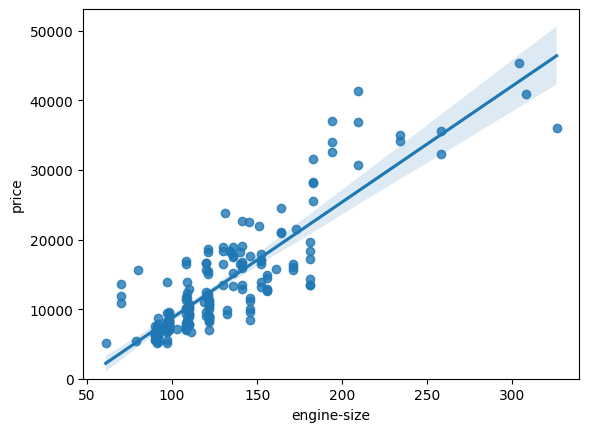

In [17]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<p>À mesure que la taille du moteur augmente, le prix augmente : cela indique une corrélation directe positive entre ces deux variables. La taille du moteur semble être un assez bon prédicteur du prix car la ligne de régression est presque une diagonale parfaite.</p>

Nous pouvons examiner la corrélation entre 'engine-size' et 'price' et voir qu'elle est d'environ 0,87.

In [18]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Les miles par gallon sur autoroute (Highway mpg) sont une variable prédictrice potentielle du prix.

<Axes: xlabel='highway-mpg', ylabel='price'>

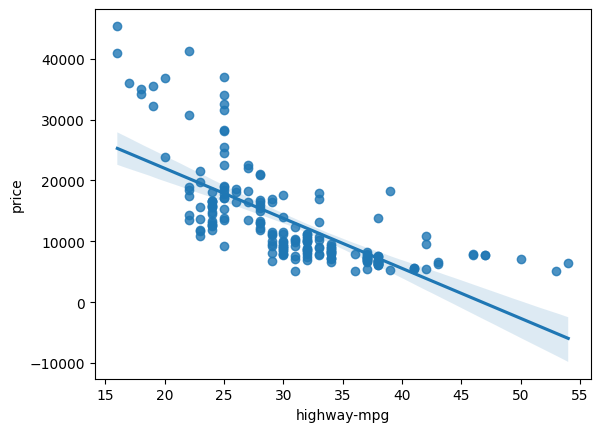

In [19]:
sns.regplot(x="highway-mpg", y="price", data=df)

<p>À mesure que les miles par gallon sur autoroute (Highway mpg) augmentent, le prix diminue : cela indique une relation inverse/négative entre ces deux variables. Les miles par gallon sur autoroute pourraient potentiellement être un prédicteur du prix.</p>

Nous pouvons examiner la corrélation entre 'highway-mpg' et 'price' et voir qu'elle est d'environ -0,704.

In [20]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<h3>Relation linéaire faible</h3>







Voyons si "Peak-rpm" est une variable prédictive du "prix".

<Axes: xlabel='peak-rpm', ylabel='price'>

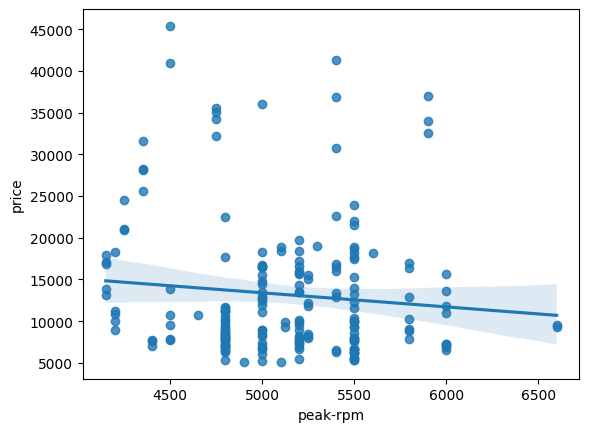

In [21]:
sns.regplot(x="peak-rpm", y="price", data=df)

<p>Le pic de tr/min (Peak rpm) ne semble pas être un bon prédicteur du prix du tout, car la ligne de régression est proche de l'horizontale. De plus, les points de données sont très dispersés et loin de la ligne ajustée, montrant beaucoup de variabilité. Par conséquent, ce n'est pas une variable fiable.</p>

Nous pouvons examiner la corrélation entre 'peak-rpm' et 'price' et voir qu'elle est d'environ -0,101616.

In [22]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  3 a): </h1>
<p>Trouvez la corrélation entre x="stroke", y="price".</p>
<p>Indice : si vous souhaitez sélectionner ces colonnes, utilisez la syntaxe suivante : df[["stroke","price"]]  </p>
</div>


In [23]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python

#The correlation is 0.0823, the non-diagonal elements of the table.

df[["stroke","price"]].corr()

```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  3 b):</h1>
<p>Étant donné les résultats de corrélation entre "price" et "stroke", vous attendez-vous à une relation linéaire ?</p> 
<p>Vérifiez vos résultats en utilisant la fonction "regplot()".</p>
</div>


In [24]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python

#There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well. We can see this using "regplot" to demonstrate this.

#Code: 
sns.regplot(x="stroke", y="price", data=df)

```

</details>


<h3>Variables catégorielles</h3>

<p>Il s'agit de variables qui décrivent une 'caractéristique' d'une unité de données, et qui sont sélectionnées parmi un petit groupe de catégories. Les variables catégorielles peuvent avoir le type "object" ou "int64". Une bonne façon de visualiser les variables catégorielles est d'utiliser des boîtes à moustaches (boxplots).</p>

Examinons la relation entre "body-style" et "price".

<Axes: xlabel='body-style', ylabel='price'>

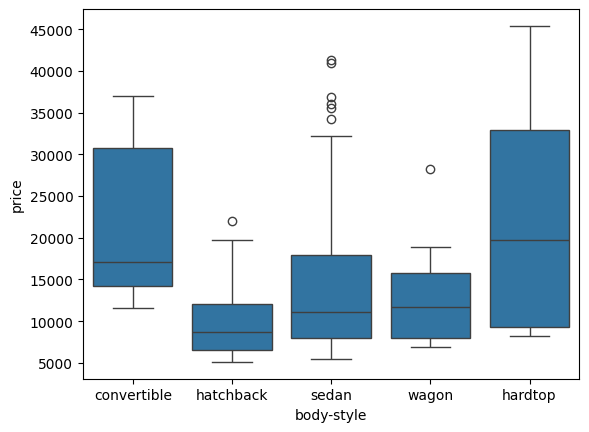

In [25]:
sns.boxplot(x="body-style", y="price", data=df)

<p>Nous constatons que les distributions de prix entre les différentes catégories de style de carrosserie se chevauchent significativement, et donc le style de carrosserie ne serait pas un bon prédicteur du prix. Examinons la "localisation du moteur" (engine-location) et le "prix" :</p>

<Axes: xlabel='engine-location', ylabel='price'>

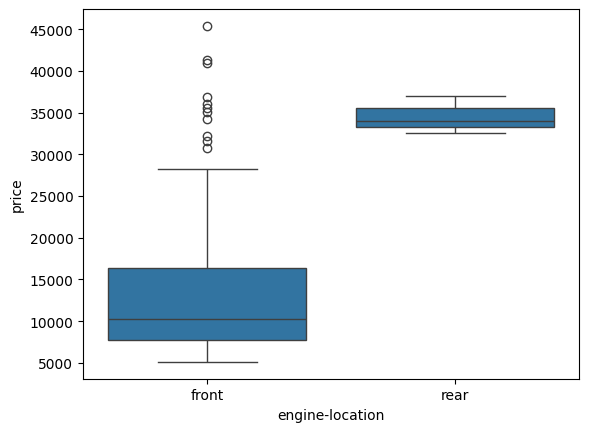

In [26]:
sns.boxplot(x="engine-location", y="price", data=df)

<p>Ici, nous voyons que la distribution des prix entre ces deux catégories de localisation du moteur, avant et arrière, est suffisamment distincte pour considérer la localisation du moteur comme un potentiel bon prédicteur du prix.</p>

Examinons "drive-wheels" et "price".

<Axes: xlabel='drive-wheels', ylabel='price'>

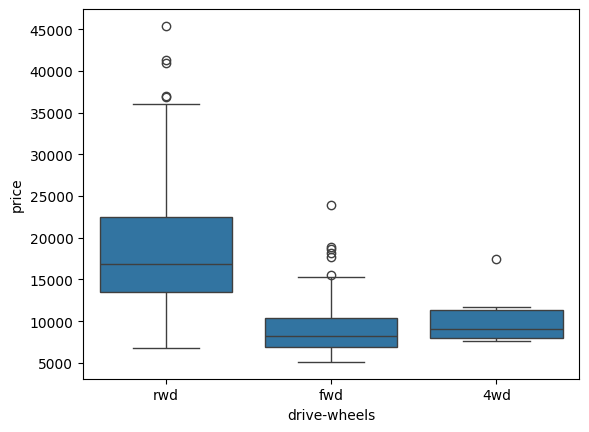

In [27]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

<p>Ici, nous constatons que la distribution des prix entre les différentes catégories de roues motrices diffère ; en tant que tel, les roues motrices pourraient potentiellement être un prédicteur du prix.</p>

<h2 id="discriptive_statistics">3. Analyse statistique descriptive</h2>

<p>Commençons par examiner les variables en utilisant une méthode de description.</p>

<p>La fonction <b>describe</b> calcule automatiquement des statistiques de base pour toutes les variables continues. Toutes les valeurs NaN sont automatiquement ignorées dans ces statistiques.</p>

Cela affichera :

<ul>
    <li>le nombre d'observations de cette variable</li>
    <li>la moyenne</li>
    <li>l'écart-type (std)</li> 
    <li>la valeur minimale</li>
    <li>le TCI (Tiers Centile Interquartile : 25%, 50% et 75%)</li>
    <li>la valeur maximale</li>
<ul>

Nous pouvons appliquer la méthode "describe" comme suit :

In [28]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


Le paramètre par défaut de "describe" ignore les variables de type objet. Nous pouvons appliquer la méthode "describe" sur les variables de type 'object' comme suit :

In [29]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


<h3>Décompte des valeurs</h3>

<p>Le décompte des valeurs est une bonne façon de comprendre combien d'unités de chaque caractéristique/variable nous avons. Nous pouvons appliquer la méthode "value_counts" sur la colonne 'drive-wheels'. N'oubliez pas que la méthode "value_counts" ne fonctionne que sur les séries Pandas, pas sur les DataFrames Pandas. Par conséquent, nous n'incluons qu'une paire de crochets "df['drive-wheels']" et non pas deux paires de crochets "df[['drive-wheels']]".</p>

In [30]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

Nous pouvons convertir la série en un DataFrame de la manière suivante :

In [31]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


Répétons les étapes ci-dessus mais en sauvegardant les résultats dans le DataFrame "drive_wheels_counts" et en renommant la colonne 'drive-wheels' en 'value_counts'.

In [32]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


Maintenant, renommons l'index en 'drive-wheels':

In [33]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


Nous pouvons répéter le processus ci-dessus pour la variable 'engine-location'.

In [34]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


<p>Examiner le décompte des valeurs de la localisation du moteur ne serait pas une bonne variable prédictive pour le prix. Cela est dû au fait que nous n'avons que trois voitures avec un moteur arrière et 198 avec un moteur à l'avant, ce résultat est biaisé. Ainsi, nous ne sommes pas en mesure de tirer de conclusions sur la localisation du moteur.</p>

<h2 id="basic_grouping">4. Principes de regroupement</h2>



<p>La méthode "groupby" regroupe les données par différentes catégories. Les données sont regroupées en fonction d'une ou plusieurs variables et une analyse est effectuée sur les groupes individuels.</p>

<p>Par exemple, regroupons par la variable "drive-wheels". Nous voyons qu'il existe 3 catégories différentes de roues motrices.</p>

In [35]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>Si nous voulons savoir, en moyenne, quel type de roues motrices est le plus précieux, nous pouvons regrouper "drive-wheels" puis les moyennes.</p>

<p>Nous pouvons sélectionner les colonnes 'drive-wheels', 'body-style' et 'price', puis les assigner à la variable "df_group_one".</p>

In [36]:
df_group_one = df[['drive-wheels','body-style','price']]

Nous pouvons ensuite calculer le prix moyen pour chacune des différentes catégories de données.

In [41]:
# Step 1: Check data types
print(df_group_one.info())

# Step 2: Convert data types if necessary (example)
# Convert 'column_name' to numeric, coercing errors into NaN (you can handle these NaN values as needed)
df_group_one['drive-wheels'] = pd.to_numeric(df_group_one['drive-wheels'], errors='coerce')

# Step 3: Calculate mean only for numeric columns
# Assuming 'column_name' is the column you want the mean of, and it's now numeric
df_group_one = df_group_one.groupby(['drive-wheels'], as_index=False)[['drive-wheels']].mean()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   drive-wheels  0 non-null      float64
dtypes: float64(1)
memory usage: 124.0 bytes
None


<p>D'après nos données, il semble que les véhicules à propulsion arrière soient, en moyenne, les plus chers, tandis que les véhicules à quatre roues motrices et à traction avant sont approximativement au même prix.</p>

<p>Vous pouvez également regrouper avec plusieurs variables. Par exemple, regroupons par 'drive-wheels' et 'body-style'. Cela regroupe le dataframe par les combinaisons uniques de 'drive-wheels' et 'body-style'. Nous pouvons stocker les résultats dans la variable 'grouped_test1'.</p>

In [42]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p>Ces données regroupées sont beaucoup plus faciles à visualiser lorsqu'elles sont transformées en une table pivot. Une table pivot est comme une feuille de calcul Excel, avec une variable le long de la colonne et une autre le long de la ligne. Nous pouvons convertir le dataframe en une table pivot en utilisant la méthode "pivot" pour créer une table pivot à partir des groupes.</p>

<p>Dans ce cas, nous laisserons la variable 'drive-wheel' comme les lignes de la table, et nous ferons pivoter 'body-style' pour devenir les colonnes de la table :</p>

In [43]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<p>Souvent, nous n'aurons pas de données pour certaines des cellules pivot. Nous pouvons remplir ces cellules manquantes avec la valeur 0, mais toute autre valeur pourrait potentiellement être utilisée également. Il convient de mentionner que les données manquantes sont un sujet assez complexe et constituent un cours à part entière.</p>

In [44]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 4:</h1>

<p>Utilisez la fonction "groupby" pour trouver le prix moyen de chaque voiture en fonction du "body-style" ? </p>
</div>


<details><summary>Click here for the solution</summary>

```python
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

```

</details>


If you haven't imported "pyplot" yet, let's do it now.

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline 

<h4>Variables: Drive Wheels and Body Style vs Price</h4>



Utilisons un heatmap pour visualiser la relation entre le style de carrosserie et le prix.

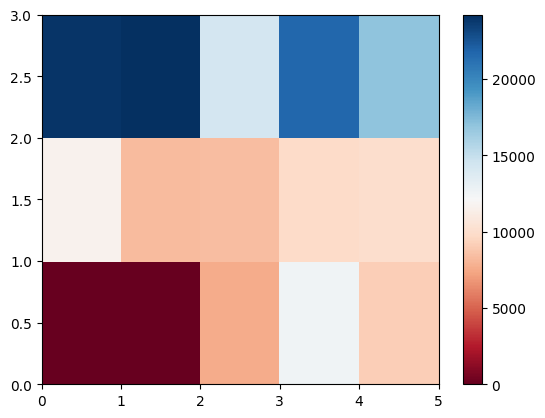

In [46]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p>Le heatmap trace la variable cible (prix) proportionnelle à la couleur par rapport aux variables 'drive-wheel' et 'body-style' respectivement sur les axes vertical et horizontal. Cela nous permet de visualiser comment le prix est lié à 'drive-wheel' et 'body-style'.</p>

<p>Les étiquettes par défaut ne nous fournissent aucune information utile. Changeons cela :</p>

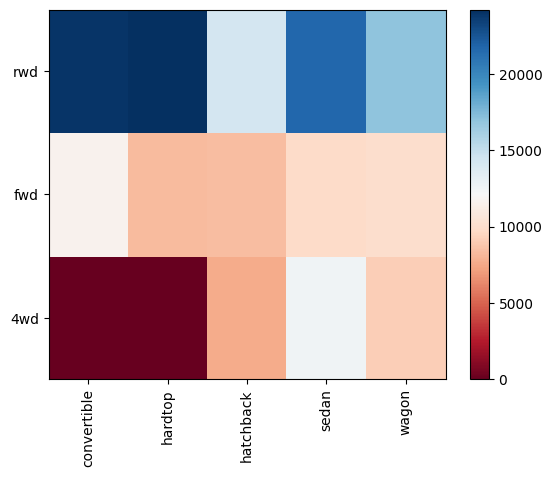

In [47]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>La visualisation est très importante en science des données, et les packages de visualisation Python offrent une grande liberté. Nous approfondirons davantage dans un cours de visualisation Python séparé.</p>

<p>La question principale que nous voulons répondre dans ce module est : "Quelles sont les principales caractéristiques qui ont le plus d'impact sur le prix de la voiture ?".</p>

<p>Pour obtenir une meilleure mesure des caractéristiques importantes, nous examinons la corrélation de ces variables avec le prix de la voiture, en d'autres termes : comment le prix de la voiture dépend-il de cette variable ?</p>

<h2 id="correlation_causation">5. Corrélation et Causalité</h2>

<p><b>Corrélation</b> : une mesure de l'étendue de l'interdépendance entre les variables.</p>

<p><b>Causalité</b> : la relation entre la cause et l'effet entre deux variables.</p>

<p>Il est important de connaître la différence entre ces deux concepts et de comprendre que la corrélation n'implique pas la causalité. Déterminer la corrélation est beaucoup plus simple que déterminer la causalité, car la causalité peut nécessiter une expérimentation indépendante.</p>

<p><b>Corrélation de Pearson</b></p>

<p>La corrélation de Pearson mesure la dépendance linéaire entre deux variables X et Y.</p>
<p>Le coefficient résultant est une valeur comprise entre -1 et 1 inclus, où :</p>
<ul>
    <li><b>1</b> : Corrélation linéaire positive totale.</li>
    <li><b>0</b> : Aucune corrélation linéaire, les deux variables ne s'influencent probablement pas l'une l'autre.</li>
    <li><b>-1</b> : Corrélation linéaire négative totale.</li>
</ul>

<p>La corrélation de Pearson est la méthode par défaut de la fonction "corr". Comme précédemment, nous pouvons calculer la corrélation de Pearson des variables de type 'int64' ou 'float64'.</p>

In [49]:
df.select_dtypes(include="number").corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Parfois, nous aimerions connaître la signification de l'estimation de la corrélation.

<b>Valeur de p</b> :

<p>Qu'est-ce que cette valeur de p ? La valeur de p est la valeur de probabilité que la corrélation entre ces deux variables soit statistiquement significative. Normalement, nous choisissons un niveau de signification de 0,05, ce qui signifie que nous sommes sûrs à 95 % que la corrélation entre les variables est significative.</p>

Par convention, lorsque

<ul>
    <li>la valeur de p est $<$ 0,001 : nous disons qu'il y a des preuves solides que la corrélation est significative.</li>
    <li>la valeur de p est $<$ 0,05 : il y a des preuves modérées que la corrélation est significative.</li>
    <li>la valeur de p est $<$ 0,1 : il y a des preuves faibles que la corrélation est significative.</li>
    <li>la valeur de p est $>$ 0,1 : il n'y a pas de preuves que la corrélation est significative.</li>
</ul>

Nous pouvons obtenir ces informations en utilisant le module "stats" de la bibliothèque "scipy".

In [50]:
from scipy import stats

<h3>wheel-base vs Price</h3>

Calculons le coefficient de corrélation de Pearson et la valeur de p de 'wheel-base' et 'price'.

In [51]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732947e-20


<h5>Conclusion :</h5>
<p>Étant donné que la valeur de p est $<$ 0,001, la corrélation entre l'empattement et le prix est statistiquement significative, bien que la relation linéaire ne soit pas extrêmement forte (~0,585).</p>

<h3>horsepower vs Price</h3>

Calculons le coefficient de corrélation de Pearson et la valeur de p de 'horsepower' et 'price'.

In [52]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  6.369057428259526e-48


<h5>Conclusion :</h5>

<p>Étant donné que la valeur de p est $<$ 0,001, la corrélation entre la puissance et le prix est statistiquement significative, et la relation linéaire est assez forte (~0,809, proche de 1).</p>

<h3>length vs Price</h3>

Calculons le coefficient de corrélation de Pearson et la valeur de p de 'longueur' et 'prix'.

In [53]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483638  with a P-value of P =  8.016477466159709e-30


<h5>Conclusion :</h5>
<p>Étant donné que la valeur de p est $<$ 0,001, la corrélation entre la longueur et le prix est statistiquement significative, et la relation linéaire est modérément forte (~0,691).</p>

<h3>Width vs Price</h3>


Calculons le coefficient de corrélation de Pearson et la valeur de p de 'largeur' et 'prix':

In [54]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522672  with a P-value of P = 9.200335510482065e-38


##### Conclusion :

Étant donné que la valeur de p est < 0,001, la corrélation entre la largeur et le prix est statistiquement significative, et la relation linéaire est assez forte (~0,751).

### Curb-weight vs Price


Calculons le coefficient de corrélation de Pearson et la valeur de p de 'poids à vide' et 'prix':

In [55]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238893972e-53


<h5>Conclusion :</h5>
<p>Étant donné que la valeur de p est $<$ 0,001, la corrélation entre le poids à vide et le prix est statistiquement significative, et la relation linéaire est assez forte (~0,834).</p>

<h3>engine-size vs Price</h3>

Calculons le coefficient de corrélation de Pearson et la valeur de p de 'engine-size' et 'price':

In [56]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455182  with a P-value of P = 9.265491622200262e-64


<h5>Conclusion :</h5>

<p>Étant donné que la valeur de p est $<$ 0,001, la corrélation entre la taille du moteur et le prix est statistiquement significative, et la relation linéaire est très forte (~0,872).</p>

<h3>Bore vs Price</h3>


Calculons le coefficient de corrélation de Pearson et la valeur de p de 'bore' et 'price':

In [57]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626603  with a P-value of P =   8.04918948393533e-17


<h5>Conclusion :</h5>
<p>Étant donné que la valeur de p est $<$ 0,001, la corrélation entre le diamètre et le prix est statistiquement significative, mais la relation linéaire est seulement modérée (~0,521).</p>

Nous pouvons suivre le même processus pour chaque 'City-mpg' et 'Highway-mpg' :

<h3>City-mpg vs Price</h3>


In [58]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567512e-29


<h5>Conclusion :</h5>
<p>Étant donné que la valeur de p est $<$ 0,001, la corrélation entre city-mpg et price est statistiquement significative, et le coefficient d'environ -0,687 montre que la relation est négative et modérément forte.</p>

<h3>Highway-mpg vs Price</h3>


In [59]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144475452e-31


##### Conclusion :

Étant donné que la valeur de p est < 0,001, la corrélation entre highway-mpg et price est statistiquement significative, et le coefficient d'environ -0,705 montre que la relation est négative et modérément forte.

<h2 id="anova">6. ANOVA</h2>


L'analyse de la variance (ANOVA) est une méthode statistique utilisée pour tester s'il existe des différences significatives entre les moyennes de deux groupes ou plus. L'ANOVA renvoie deux paramètres :

- <b>Score F-test</b> : L'ANOVA suppose que les moyennes de tous les groupes sont les mêmes, calcule dans quelle mesure les moyennes réelles diffèrent de l'hypothèse, et le rapporte sous forme de score F-test. Un score plus élevé signifie qu'il y a une plus grande différence entre les moyennes.
- <b>Valeur de p</b> : La valeur de p indique à quel point notre score calculé est statistiquement significatif.

Si notre variable de prix est fortement corrélée avec la variable que nous analysons, nous nous attendons à ce que l'ANOVA renvoie un score F-test important et une petite valeur de p.

<h3>Drive Wheels</h3>


<p>Étant donné que l'ANOVA analyse la différence entre différents groupes de la même variable, la fonction groupby sera utile. Comme l'algorithme ANOVA calcule automatiquement la moyenne des données, nous n'avons pas besoin de prendre la moyenne à l'avance.</p>

<p>Voyons si différents types de 'drive-wheels' ont un impact sur le 'prix', nous regroupons les données.</p>

In [60]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [61]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


Nous pouvons obtenir les valeurs du groupe à l'aide de la méthode "get_group".

In [62]:
grouped_test2.get_group('4wd')['price']

C:\Users\kombi\AppData\Local\Temp\ipykernel_30800\4164424613.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  grouped_test2.get_group('4wd')['price']


4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

Nous pouvons utiliser la fonction 'f_oneway' du module 'stats' pour obtenir le <b>score F-test</b> et la <b>valeur de p</b>.

In [63]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577149576e-23


C:\Users\kombi\AppData\Local\Temp\ipykernel_30800\4111350723.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])


C'est un excellent résultat, avec un grand score de test F montrant une forte corrélation et une valeur de p presque égale à 0, ce qui implique une signification statistique presque certaine. Mais est-ce que cela signifie que les trois groupes testés sont tous aussi fortement corrélés ?

#### Séparément : fwd et rwd


In [64]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677366e-23


C:\Users\kombi\AppData\Local\Temp\ipykernel_30800\1567334666.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])


Examinons les autres groupes.

#### 4wd et rwd


In [65]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225367


C:\Users\kombi\AppData\Local\Temp\ipykernel_30800\4057563169.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])


<h4>4wd et fwd</h4>


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

<h3>Conclusion : Variables importantes</h3>

Nous avons maintenant une meilleure idée de l'aspect de nos données et des variables importantes à prendre en compte lors de la prédiction du prix de la voiture. Nous avons réduit notre sélection aux variables suivantes :

Variables numériques continues :

- Longueur
- Largeur
- Poids à vide
- Taille du moteur
- Puissance
- MPG en ville
- MPG sur autoroute
- Empattement
- Diamètre

Variables catégorielles :

- Type de transmission

Maintenant que nous passons à la construction de modèles d'apprentissage automatique pour automatiser notre analyse, fournir au modèle des variables qui influent de manière significative sur notre variable cible améliorera les performances de prédiction de notre modèle.